Import required libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

#Data preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer

# Ml estimators
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn import metrics

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
fake=pd.read_csv("datasets/Fake and Real News/Fake.csv",nrows=500)
true=pd.read_csv("datasets/Fake and Real News/True.csv",nrows=500)

Peak the datasets

In [3]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.columns, true.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

Create a target column in the dataset

In [6]:
fake['target']='fake'
true['target']='true'

In [7]:
fake.columns, true.columns

(Index(['title', 'text', 'subject', 'date', 'target'], dtype='object'),
 Index(['title', 'text', 'subject', 'date', 'target'], dtype='object'))

Union the two datasets

In [8]:
df=pd.concat([fake,true])

Shuffle dataset

In [9]:
df=shuffle(df).reset_index(drop=True)

Inspect data

In [10]:
df.head()

,title,text,subject,date,target
0,A Reporter Asked Paul Ryan If He Still Has Co...,After House Speaker Paul Ryan stood in front o...,News,"May 17, 2017",fake
1,Kenya frees Odinga adviser arrested on suspici...,NAIROBI (Reuters) - A prominent strategist for...,worldnews,"December 4, 2017",true
2,"BLACK LAWYER, Editor Of Legal Website Writes: ...","Elie Mystal, an editor and contributor to the ...",left-news,"Dec 9, 2016",fake
3,U.S. lawmaker says House intel panel near cons...,WASHINGTON (Reuters) - Members of the U.S. Hou...,politicsNews,"November 29, 2017",true
4,LIBERALS ARE AFRAID Of Kid Rock Running For U....,Kid Rock has struck panic into the hearts of l...,left-news,"Jul 16, 2017",fake


In [11]:
df.shape

(44898, 5)

In [12]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
title      44898 non-null object
text       44898 non-null object
subject    44898 non-null object
date       44898 non-null object
target     44898 non-null object
dtypes: object(5)
memory usage: 1.7+ MB


Split data into Training and Validation sets

In [14]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['target'],test_size=0.25, random_state=300)

Create a Pipleline

In [15]:
pipe=Pipeline([('count_vectorizer',CountVectorizer()),
               ('tfid',TfidfTransformer()),
               ('model',LogisticRegression())
              ])

Train the model

In [16]:
model=pipe.fit(X_train,y_train)

Sample Predition

In [17]:
prediction=model.predict(X_test)

In [18]:
prediction[0:5]

array(['true', 'fake', 'true', 'fake', 'true'], dtype=object)

In [19]:
np.array(y_test[0:5])

array(['true', 'fake', 'true', 'fake', 'true'], dtype=object)

Model Evaluation

1. Accuracy

In [20]:
metrics.accuracy_score(prediction,y_test)*100

98.72605790645879

2. Confusion Matrix

In [21]:
metrics.confusion_matrix(prediction,y_test)

array([[5846,   68],
       [  75, 5236]], dtype=int64)

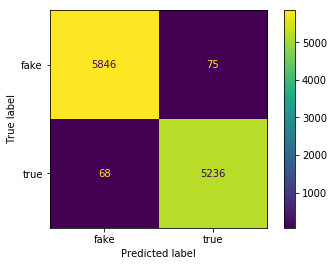

In [22]:
metrics.plot_confusion_matrix(model,X_test,y_test)
plt.show()

3. Classification Report

In [23]:
print(metrics.classification_report(prediction,y_test))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      5914
        true       0.99      0.99      0.99      5311

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



Conclusion

The model can be improved by:
    1. Performing adequate text preprocessing.
    2. Using different Algorithms
    3. Exhaustive feature engineering.
    4. Having quality data

Other models to experiment with:
    1. LinearSVC
    2. GaussianNB
    3. BernoulliNB
    4. MultinomialNB
    5. GradientBoostingClassifier
    6. DecisionTreeClassifier
    7. KNeighborsClassifier
    8. XGBClassifier
    9. SGDClassifier
    10. RandomForestClassifier